# Read an impulse response (IR) and plot it

Read an IR either from a .txt file as produced by the utilities in this project (`transform_all_pir_to_txt` script) or from an ARTA PIR file.

1. Import the following libraries
2. Read the IR from either a txt or a pir
3. See it!

## Importing the libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pir import PirFile
from utils import expand_absolute_path

## Reading the IR from a .txt

Read the impulse response from a .txt as exported by the Python script `transform_all_pir_to_txt`. Set the path to the txt file in the empty string in the first line of the following cell, and the sample rate in the next line.

In [2]:
file_path = expand_absolute_path("")  # Set the empty string to the ABSOLUTE path to the .txt file.
sample_rate = 48000
with open(file_path, 'r') as file:
    ir = []
    while value := file.readline():
        ir.append(float(value.strip('\n')))

ir = np.array(ir)
time_vector = np.linspace(0, ir.shape[0] / sample_rate, ir.shape[0])
ir_matrix = np.array([time_vector, ir]).T

## Reading the IR from a .pir file

Use the utilities in this project to read an impulse response from a .pir file. Set the path to the pir file in the empty string in the first line of the following cell.

In [2]:
pir_path = expand_absolute_path("/home/ivan/Documents/estudio/untref/materias/electroacustica ii/tps/tp2/Farfield activo.pir")  # Set the empty string to the path to the .pir file.
pir_file = PirFile.of(pir_path)
ir = np.array(pir_file.get_pir_data())
# time_vector = np.linspace(0, ir.shape[0] / pir_file.get_sample_rate(), ir.shape[0])
time_vector = pir_file.get_time_vector()
ir_matrix = pir_file.get_ir().T
print(ir_matrix)

[[0.00000000e+00 1.84408725e-06]
 [2.08333333e-05 1.43549505e-06]
 [4.16666667e-05 1.57154125e-06]
 ...
 [1.36527083e+00 4.22246285e-06]
 [1.36529167e+00 4.84101201e-06]
 [1.36531250e+00 5.33551520e-06]]


## Plotting the IR

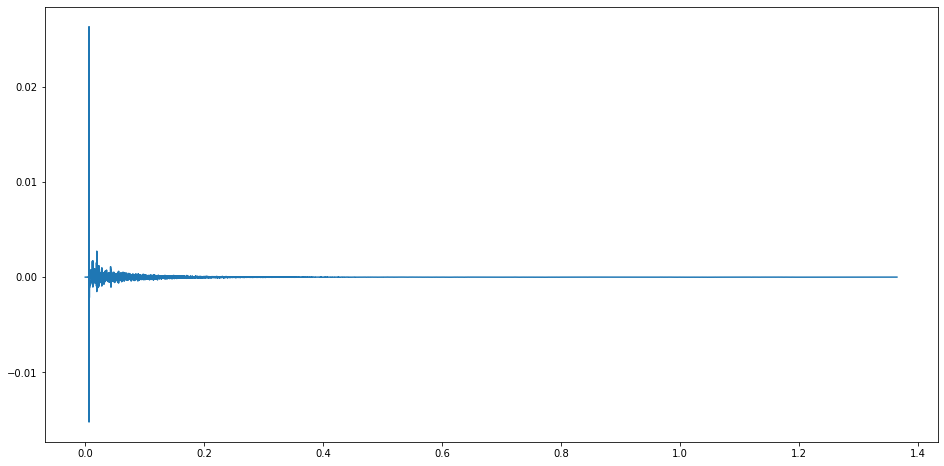

In [3]:
plt.figure(figsize=(16,8))
plt.plot(ir_matrix[:, 0], ir_matrix[:, 1])
plt.show()